In [1]:
import ertai

In [2]:
assert ertai.__version__ == "0.0.2"

In [3]:
spell_cost = ertai.Mana("Blue", "Blue")
spell_cost

2 Blue Mana

In [4]:
mana_pool = ertai.Mana("Blue", "Red", "Red", "Blue")
mana_pool

2 Blue Mana, 2 Red Mana

In [5]:
spell_cost <= mana_pool

True

In [6]:
def create_deck(number_of_cost_1_cards, total_number_of_cards=60):
    """
    This creates a deck with nothing but cards that cost 1 mana and the rest are lands.
    """
    number_of_lands = total_number_of_cards - number_of_cost_1_cards
    lands = [ertai.BasicLand() for _ in range(number_of_lands)]
    one_mana = ertai.Mana(None)
    cost_1_cards = [ertai.Card(cost=one_mana) for _ in range(number_of_cost_1_cards)]
    return lands + cost_1_cards

In [7]:
import random

def draw_hand(deck, seed):
    """
    Shuffles a deck and draws a hand
    """
    random.seed(seed)
    return random.sample(population=deck, k=7)    

In [8]:
deck = create_deck(number_of_cost_1_cards=36)
hand = draw_hand(deck=deck, seed=0)

In [9]:
hand

[Card(title=None, cost=1 None Mana, tapped=False),
 Card(title=None, cost=1 None Mana, tapped=False),
 Card(title=None, cost=1 None Mana, tapped=False),
 Card(title=None, cost=1 None Mana, tapped=False),
 Card(title=None, cost=1 None Mana, tapped=False),
 BasicLand(title=None, cost=0 Mana, tapped=False, color=None),
 BasicLand(title=None, cost=0 Mana, tapped=False, color=None)]

In [10]:
type(hand[0])

ertai.card.Card

In [11]:
type(hand[-1])

ertai.card.BasicLand

In [12]:
def can_play_hand(hand):
    """
    Returns a boolean as to whether or not we can play a hand.
    
    As all card in this setting have cost 1 we just need to 
    confirm that there is both a land and a non-land in the hand.
    """
    card_types = [type(card) for card in hand]
    return (ertai.Card in card_types) and (ertai.BasicLand in card_types)

In [13]:
can_play_hand(hand=hand)

True

In [14]:
deck = create_deck(number_of_cost_1_cards=30)
hand = draw_hand(deck=deck, seed=0)
can_play_hand(hand=hand)

True

In [15]:
import numpy as np

def get_probability_of_being_able_to_play_card(number_of_cost_1_cards, number_of_repetitions=500):
    deck = create_deck(number_of_cost_1_cards=number_of_cost_1_cards)
    hands = [draw_hand(deck=deck, seed=seed) for seed in range(number_of_repetitions)]
    return np.mean([can_play_hand(hand) for hand in hands])

In [16]:
get_probability_of_being_able_to_play_card(number_of_cost_1_cards=36)

0.972

In [17]:
number_of_cost_1_cards_values = range(61)
probabilities = [get_probability_of_being_able_to_play_card(number_of_cost_1_cards=number) for number in number_of_cost_1_cards_values]

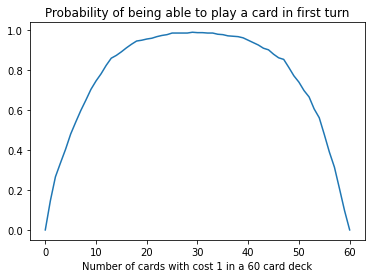

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(probabilities)
plt.xlabel("Number of cards with cost 1 in a 60 card deck")
plt.title("Probability of being able to play a card in first turn");